# Attributes:
1 Age: age of the patient [years] 

2 Sex: sex of the patient [M: Male, F: Female] 

3 ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 

4 RestingBP: resting blood pressure [mm Hg] 

5 Cholesterol: serum cholesterol [mm/dl] 

6 FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] 

7 RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 

8 MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] 

9 ExerciseAngina: exercise-induced angina [Y: Yes, N: No] 

10 Oldpeak: oldpeak = ST [Numeric value measured in depression] 

11 ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 

12 HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
print("No.of attributes in dataset are {}".format(len(df.columns)-1))

No.of attributes in dataset are 11


In [9]:
print("No.of entries in dataset are {}".format(len(df)))

No.of entries in dataset are 918


In [10]:
import seaborn as sns

In [11]:
cate_val=[]
cont_val=[]
for i in df.columns:
    if df[i].nunique() <=10:
        cate_val.append(i)
    else:
        cont_val.append(i)

In [12]:
cate_val

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [13]:
cont_val

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Univariate Analysis

# How many people have heart disease?

In [14]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

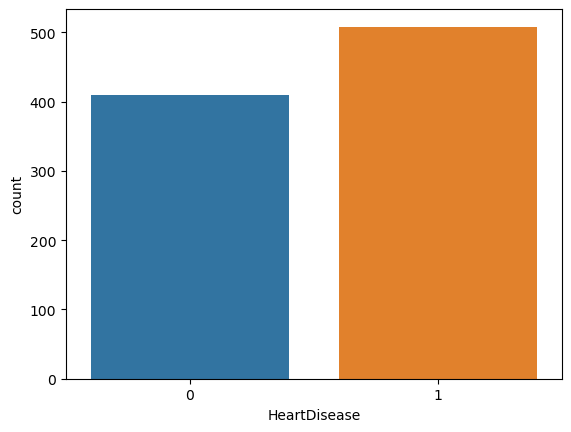

In [15]:
sns.countplot(x ='HeartDisease', data = df)

# Plotting Continuous Data

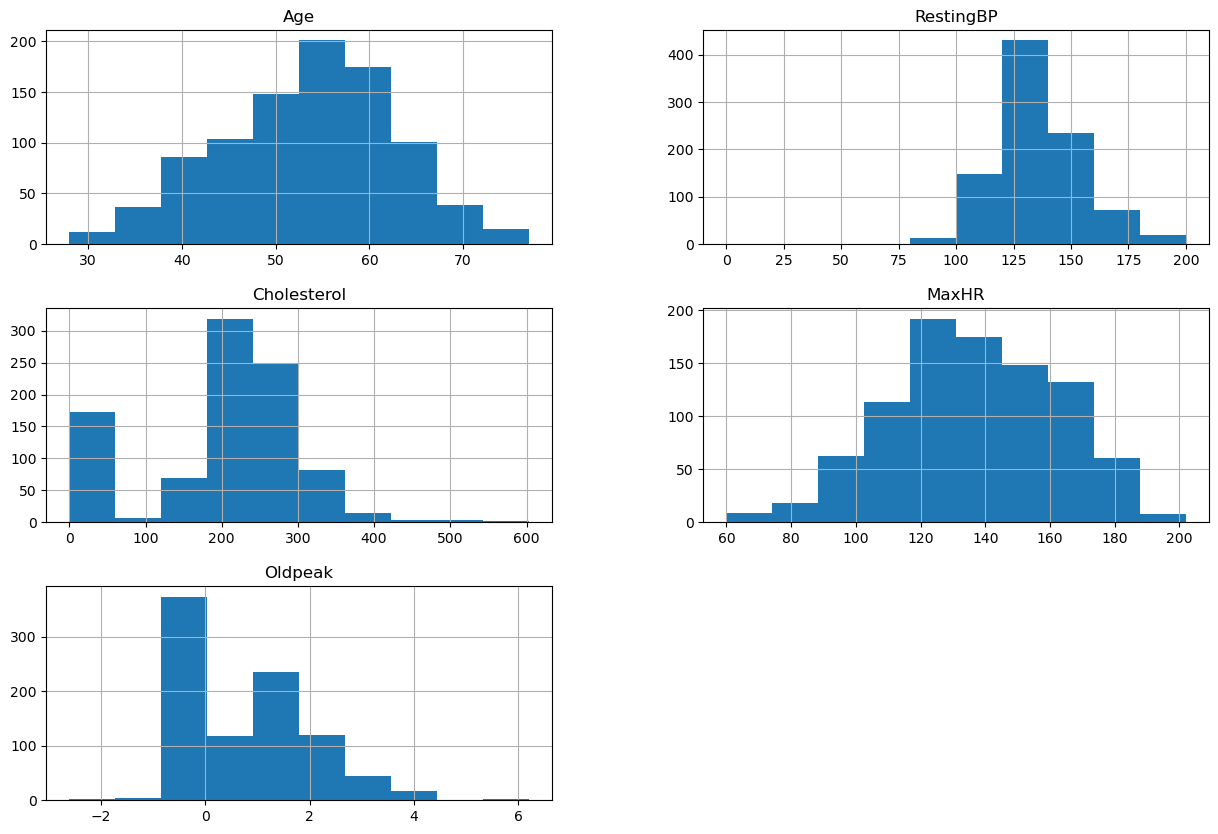

In [16]:
df.hist(cont_val,figsize=(15,10))
plt.show()

# Serum Cholesterol Distribution

<Axes: >

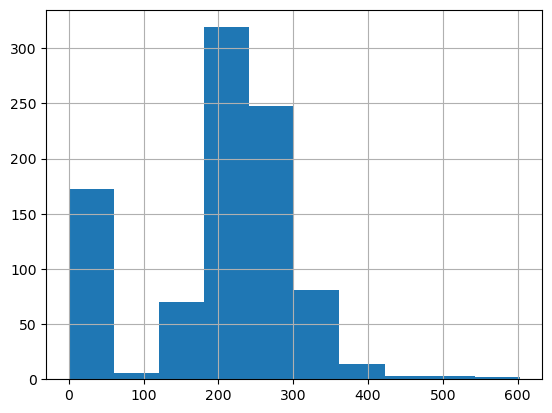

In [17]:
df['Cholesterol'].hist()

# Resting Blood-Pressure Distribution

<Axes: >

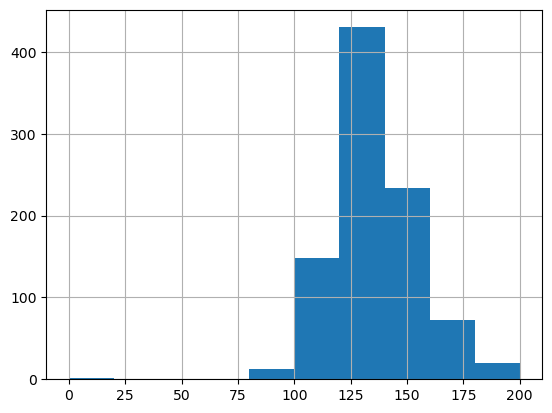

In [18]:
df['RestingBP'].hist()

# Age Distribution

C:\Users\admin\AppData\Local\Temp\ipykernel_3112\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

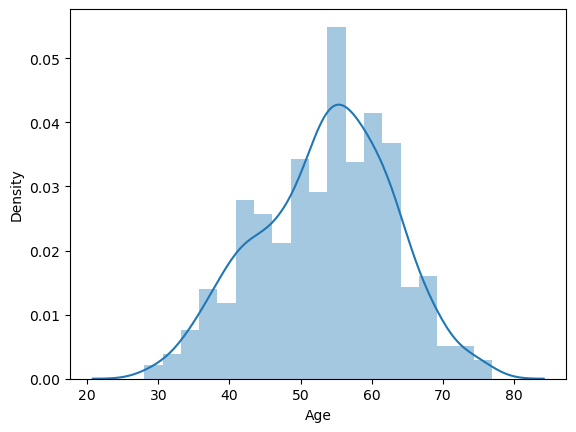

In [19]:
sns.distplot(df['Age'])

# Bivariate Analysis

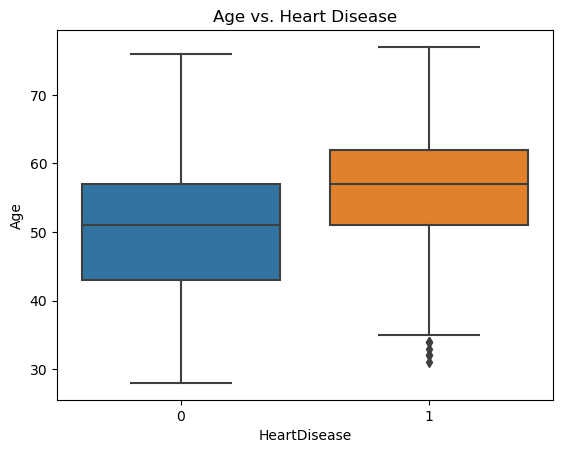

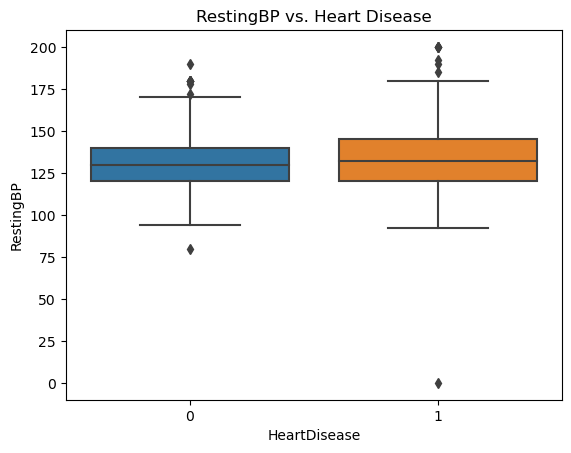

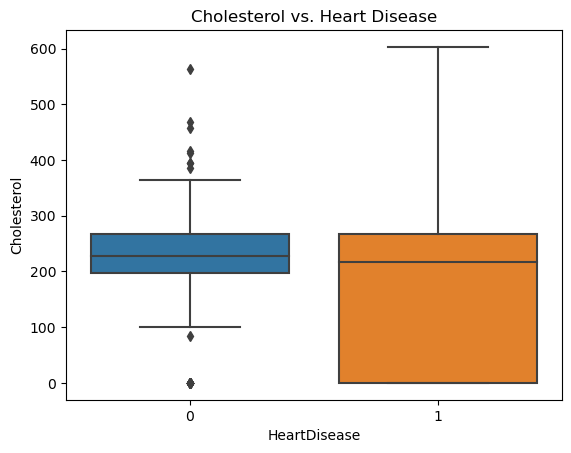

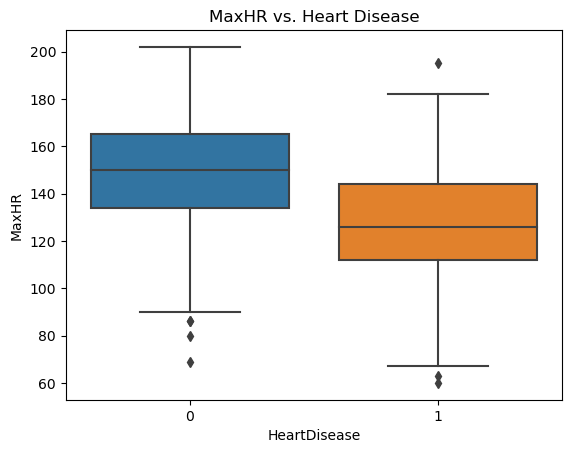

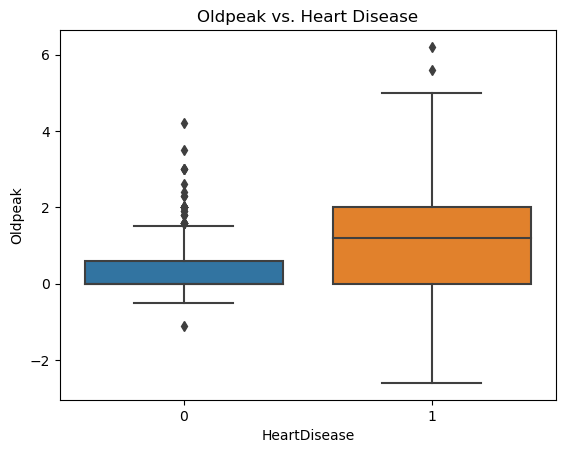

In [20]:
for var in cont_val:
    sns.boxplot(x='HeartDisease', y=var, data=df)
    plt.title(f'{var} vs. Heart Disease')
    plt.show()

# Resting Blood Pressure Distribution vs Sex

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


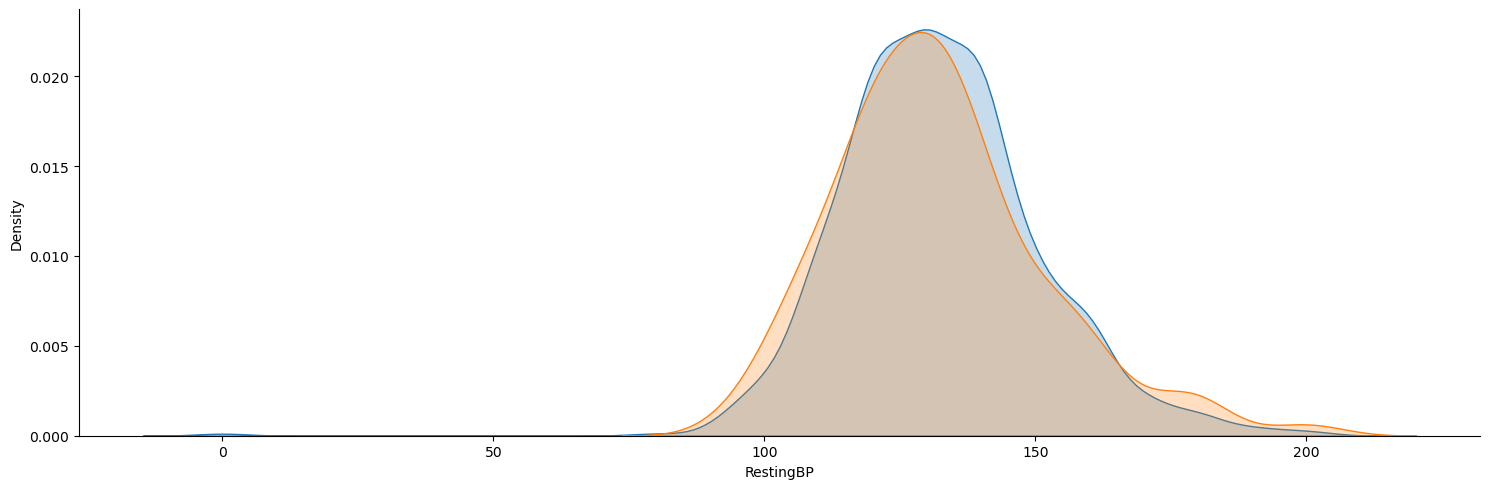

In [21]:
g=sns.FacetGrid(df,hue='Sex',height=5,aspect=3)
g.map(sns.kdeplot,'RestingBP',shade=True)

# Categorical Variable Analysis

# Gender Distribution

In [22]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

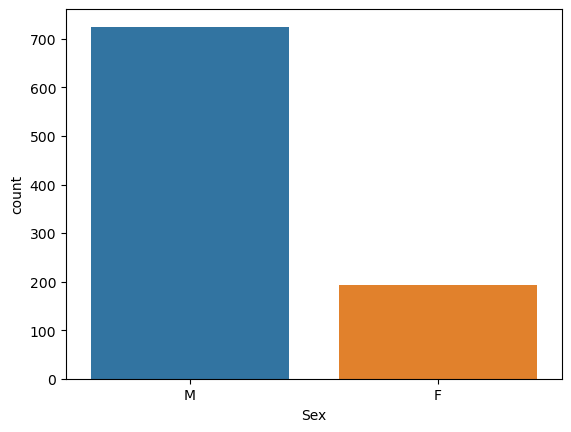

In [23]:
sns.countplot(x ='Sex', data = df)

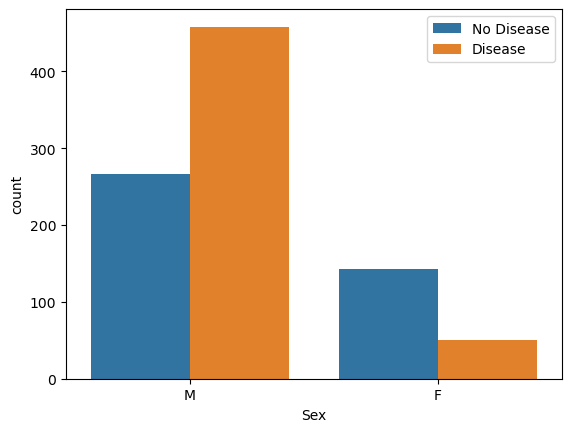

In [24]:
sns.countplot(x='Sex',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

# Chest Pain Type Distribution

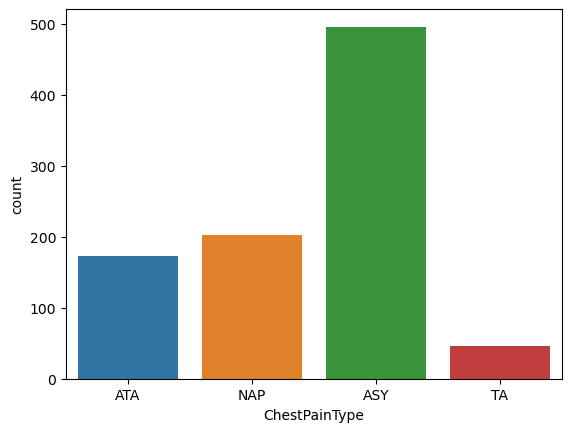

In [25]:
sns.countplot(x ='ChestPainType', data = df)
plt.show()

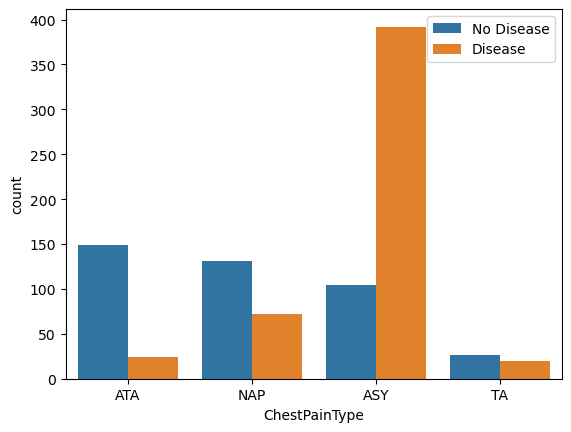

In [26]:
sns.countplot(x='ChestPainType',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

# Fasting Blood Sugar Distribution

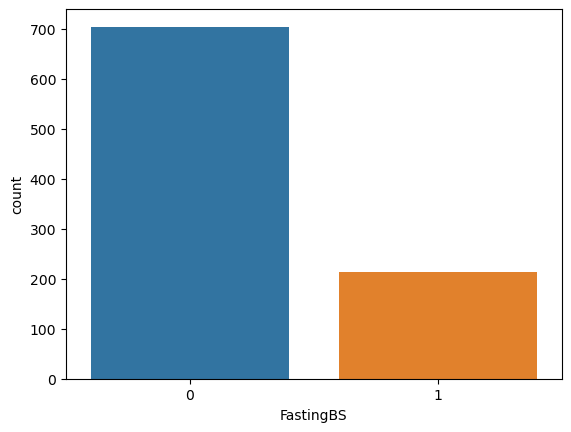

In [27]:
sns.countplot(x ='FastingBS', data = df)
plt.show()

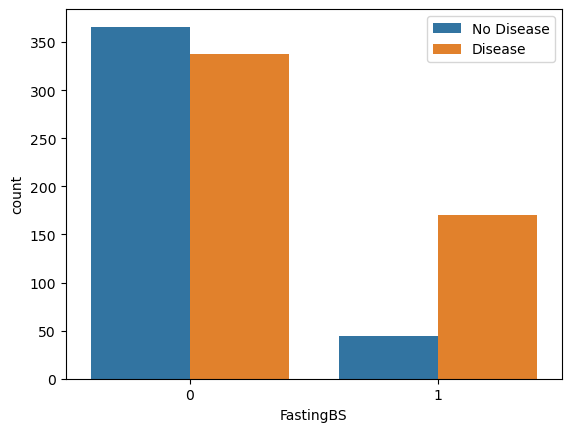

In [28]:
sns.countplot(x='FastingBS',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

# Resting ECG Distribution

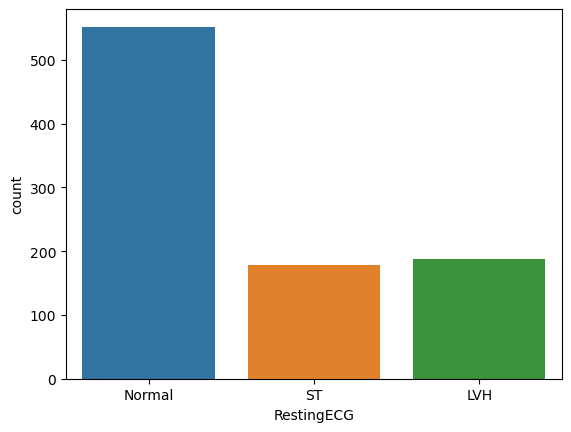

In [29]:
sns.countplot(x ='RestingECG', data = df)
plt.show()

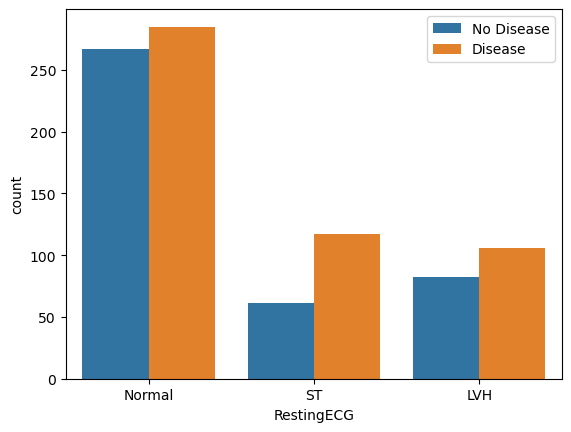

In [30]:
sns.countplot(x='RestingECG',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

# Exercise angina Distribution

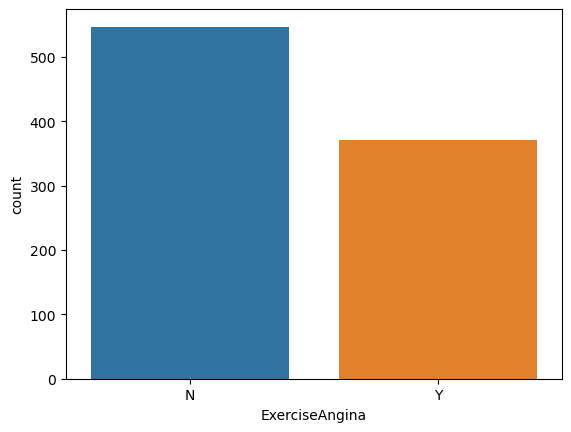

In [31]:
sns.countplot(x ='ExerciseAngina', data = df)
plt.show()

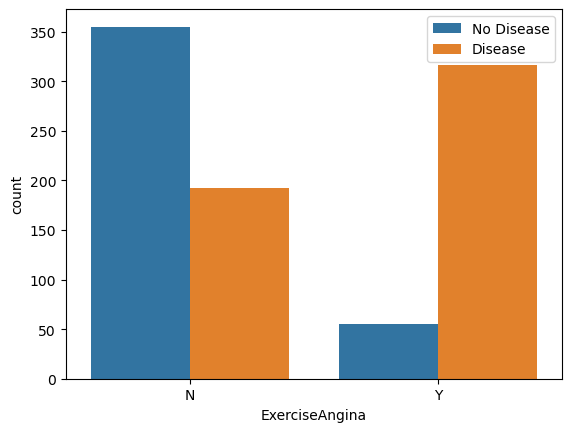

In [32]:
sns.countplot(x='ExerciseAngina',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

# ST-Slope Distribution

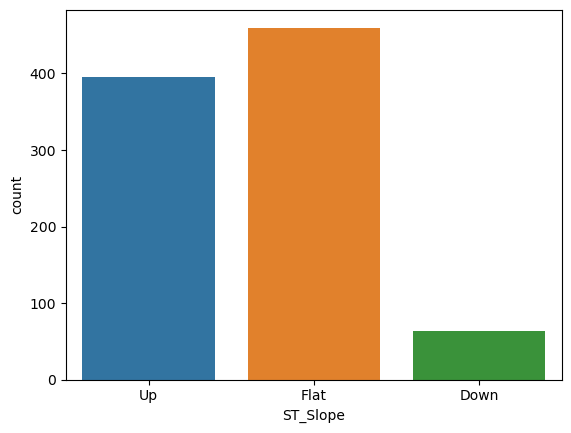

In [33]:
sns.countplot(x ='ST_Slope', data = df)
plt.show()

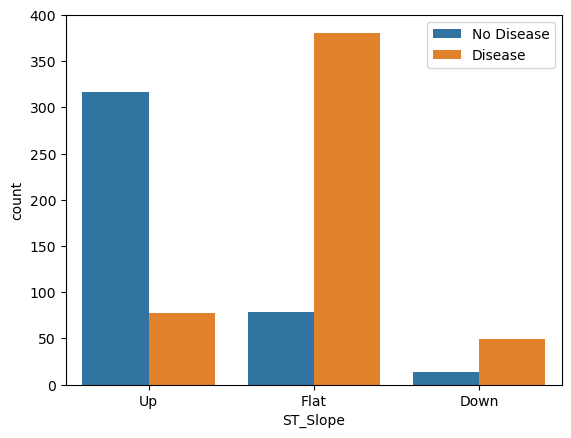

In [34]:
sns.countplot(x='ST_Slope',hue ='HeartDisease', data = df)
plt.legend(labels=["No Disease", "Disease"])
plt.show()

# Correlation

In [35]:
df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_3112\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Heatmap showcasing correlation among continuous variables

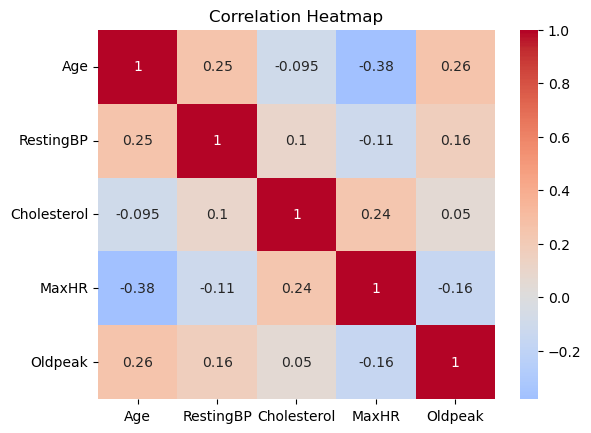

In [36]:
sns.heatmap(df[cont_val].corr(),annot=True,cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Multivariate analysis

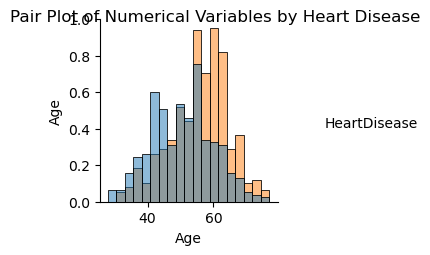

In [37]:
sns.pairplot(data=df[['Age'] + ['HeartDisease']], hue='HeartDisease', diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Variables by Heart Disease')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Encoding Categorical Variables

In [52]:
for col in ["Sex", "ChestPainType", "RestingECG", "ST_Slope", "ExerciseAngina"]:
    df[col] = df[col].factorize()[0]
print(df)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [75]:
df.to_csv("HeartDiseaseEncoded.csv")

# Splitting the features and HeartDisease
1->Heart Disease
0->Normal

In [53]:
X= df.drop(columns="HeartDisease", axis=1)
Y= df["HeartDisease"]

In [54]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [55]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


# Splitting the data into Training data and Testing data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=2)

In [57]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


# Model Training

# Logistic Regression

In [58]:
model =LogisticRegression()

In [59]:
# Training the model with training data
model.fit(X_train, Y_train)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [61]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [62]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.8569482288828338


In [63]:
# Accuracy on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [64]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.8478260869565217


# Building a Predictive System 

In [77]:
input_data = (37,0,2,140,207,0,0,130,1,1.5,1)
input_data_array=np.asarray(input_data)
input_data_reshape=input_data_array.reshape(1,-1)
prediction=model.predict(input_data_reshape)
print(prediction)

[1]


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [78]:
if (prediction[0] == 0):
    print("The person does no have a heart disease.")
else:
    print("The person has heart disease.")

The person has heart disease.
